In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os

uwb_data_prefix = 'converted_data/location_data/'
behavior_labels_prefix = 'behavior_analysis/individual_behaviors/'

In [3]:
# Load in tag data
tag = 7
uwb_data_path = uwb_data_prefix + 'T' + str(tag).zfill(2) + '_0725.csv'
behavior_labels_path = behavior_labels_prefix + 'C' + str(tag).zfill(2) + '_0725.csv'

uwb_df = pd.read_csv(uwb_data_path)
label_df = pd.read_csv(behavior_labels_path)

In [4]:
# Up-sample the uwb_data
delta = 0.1 # Sampling period of accelerometer

start_timestamp = uwb_df.iloc[0]['timestamp']
end_timestamp = uwb_df.iloc[-1]['timestamp']

timestamp_range = np.arange(start_timestamp,end_timestamp+delta,delta)
timestamp_range = np.round(timestamp_range,1)
upsampled_uwb_df = pd.DataFrame(timestamp_range,columns=['timestamp'])

# Add uwb data
upsampled_uwb_df = pd.merge(upsampled_uwb_df, uwb_df, how='left', on='timestamp')
# Add labels
upsampled_uwb_df = pd.merge(upsampled_uwb_df, label_df, how='left', on='timestamp')


# Fill the data with ffil
upsampled_uwb_df.ffill(inplace=True)
upsampled_uwb_df.dropna(inplace=True)

# Get df of all the augmented data
# Data is only augmented when the cow is
augmented_data_df = upsampled_uwb_df.loc[upsampled_uwb_df['behavior'] == 1]


/var/folders/3p/l0z33x0x0n5_jxzx6y_lct000000gp/T/ipykernel_85030/794489221.py:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  upsampled_uwb_df = pd.merge(upsampled_uwb_df, label_df, how='left', on='timestamp')


/opt/anaconda3/envs/tf_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


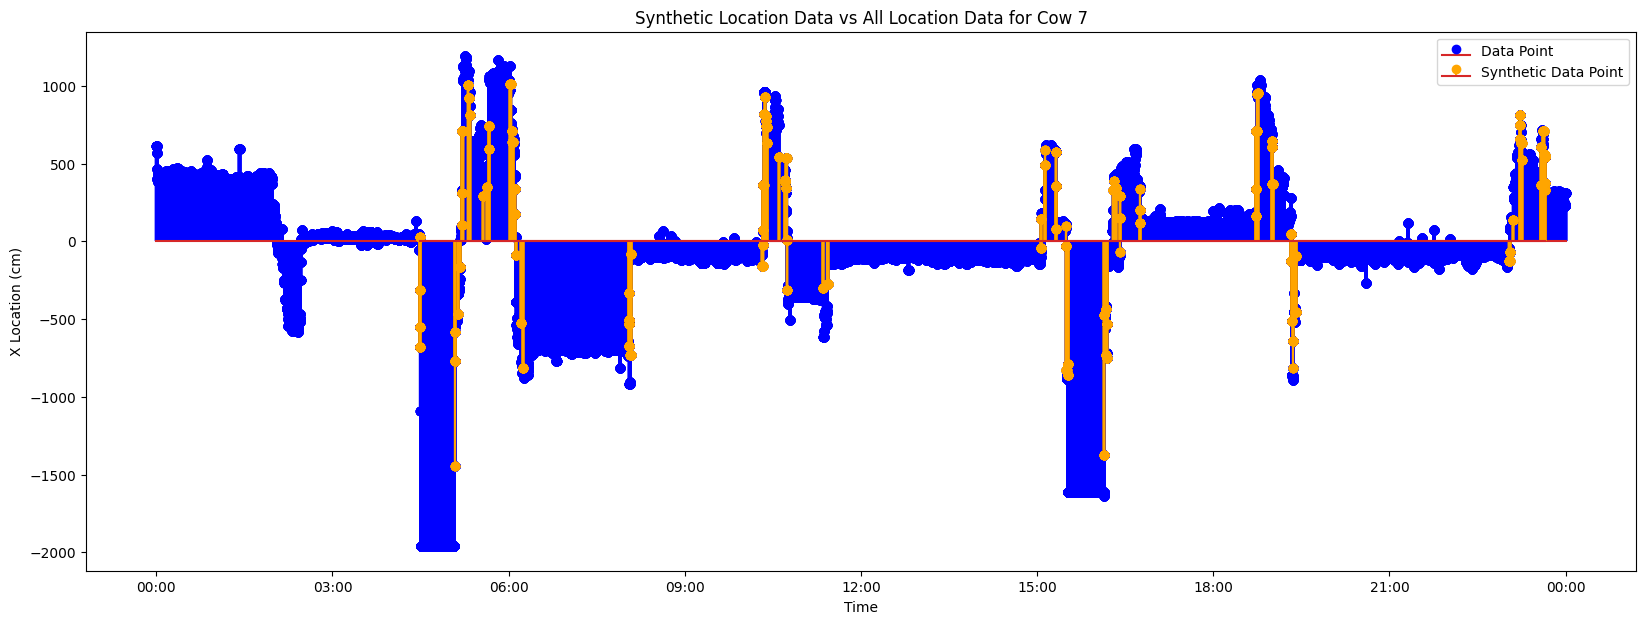

In [8]:
plt.figure(figsize=(20,7))

n = 2

plt.stem(pd.to_datetime(upsampled_uwb_df['datetime'].iloc[::n], format= '%H:%M:%S'), upsampled_uwb_df['coord_x_cm'].iloc[::n],linefmt='blue')
plt.stem(pd.to_datetime(augmented_data_df['datetime'].iloc[::n], format= '%H:%M:%S'), augmented_data_df['coord_x_cm'].iloc[::n],linefmt='orange')

xformatter = md.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.xlabel("Time")
plt.ylabel("X Location (cm)")
plt.title("Synthetic Location Data vs All Location Data for Cow 7")
plt.legend(["Data Point","Synthetic Data Point"])
plt.show()

In [ ]:
label_filepaths = os.listdir(behavior_labels_prefix)
label_filepaths = [behavior_labels_prefix + file for file in label_filepaths]

dfs = []
for filepath in label_filepaths:
    df = pd.read_csv(filepath)
    dfs.append(df)

all_labels = pd.concat(dfs)

# Get rid of unknown
all_labels = all_labels[all_labels.behavior != 0]

In [ ]:
total_labels_num = len(all_labels.index)
augmented_labels = all_labels.loc[all_labels['behavior'] == 1]
augmented_labels_num = len(augmented_labels.index)

print("The percent of augmented data is %.3f%%" % (augmented_labels_num/total_labels_num*100))

The percent of augmented data is 1.512%
